## Observations and Insights 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_raw_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

In [62]:
# Checking the number of mice in the DataFrame.
study_raw_df['Mouse ID'].nunique()

249

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_raw_df['Mouse Time'] = study_raw_df['Timepoint'].map(str) + study_raw_df['Mouse ID'].map(str)
count = study_raw_df['Mouse Time'].count()
unique = study_raw_df['Mouse Time'].nunique()
print (count,unique)

1893 1888


In [64]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = study_raw_df[study_raw_df.duplicated(subset=['Mouse Time'],keep=False)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse Time
107,g989,0,45.000000,0,Propriva,Female,21,26,0g989
137,g989,0,45.000000,0,Propriva,Female,21,26,0g989
329,g989,5,48.786801,0,Propriva,Female,21,26,5g989
360,g989,5,47.570392,0,Propriva,Female,21,26,5g989
620,g989,10,51.745156,0,Propriva,Female,21,26,10g989
681,g989,10,49.880528,0,Propriva,Female,21,26,10g989
815,g989,15,51.325852,1,Propriva,Female,21,26,15g989
869,g989,15,53.442020,0,Propriva,Female,21,26,15g989
950,g989,20,55.326122,1,Propriva,Female,21,26,20g989
1111,g989,20,54.657650,1,Propriva,Female,21,26,20g989


In [65]:
study_df = study_raw_df.drop(study_raw_df[study_raw_df["Mouse ID"]=="g989"].index)
study_df.reset_index(drop=True, inplace=True)

study_df.tail(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse Time
1879,b879,45,72.555239,2,Stelasyn,Female,4,26,45b879


In [66]:
# Checking the number of mice in the clean DataFrame.
count = study_df['Mouse Time'].count()
unique = study_df['Mouse Time'].nunique()
print (count,unique)

1880 1880


In [67]:
# Checking the number of mice in the DataFrame.
study_df['Mouse ID'].nunique()

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
stats_df = study_df.groupby('Drug Regimen').mean()[['Tumor Volume (mm3)']]
stats_df = stats_df.rename(columns={"Tumor Volume (mm3)":"mean"})
stats_df['median'] = study_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
stats_df['variance'] = study_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stats_df['std dev'] = study_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
stats_df['SEM'] = study_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
stats_df

,mean,median,variance,std dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
stats1_df = study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
stats1_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [70]:
# Give our graph axis labels, and legends
titleFont = {'family': 'serif',
        'color':  'brown',
        'weight': 'normal',
        'size': 18 , }

In [71]:
# Generate the data for the total number of mice for each treatment throughout the course of the study. 
total_mice = study_df.groupby('Drug Regimen').count()['Mouse ID']


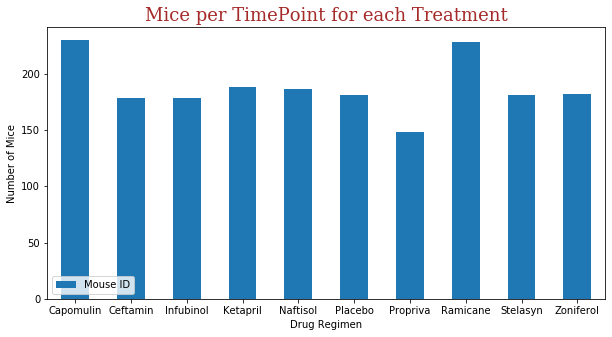

<Figure size 432x288 with 0 Axes>

In [72]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice.plot(kind="bar", figsize=(10,5), legend = False, rot = 0)

# Set a title for the chart
plt.title("Mice per TimePoint for each Treatment",titleFont)
plt.ylabel("Number of Mice")
plt.legend(loc='lower left', fontsize=10)

plt.savefig("../Images/Bar1.png")
plt.show()
plt.tight_layout()


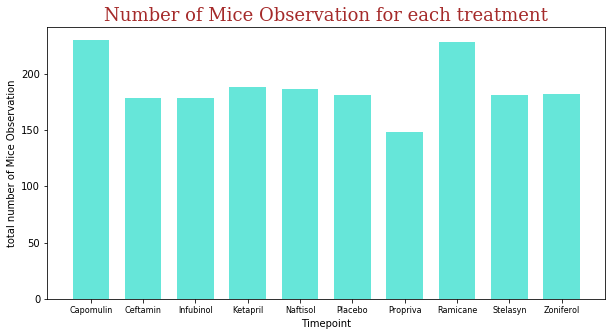

In [73]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.
fig, ax = plt.subplots(figsize=(10, 5)) 

x_axis = np.arange(len(total_mice))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, total_mice.index.tolist(), size=8)


plt.bar(x_axis,total_mice, color="turquoise",alpha=.8,
        align="center", width=.7, bottom=None)

plt.title("Number of Mice Observation for each treatment",titleFont)
plt.xlabel("Timepoint")
plt.ylabel("total number of Mice Observation")

plt.savefig("../Images/Bar2.png")
plt.show()

In [74]:
# The above chart is not a good representation for the information because the total number of mice observation here is 
# the total of the number of the same mice being observed on different times. 
# For each treatment we have max 25 mice, that die along the study, and thus the number decreases on each observation, 
# and thus the number here is not a real number.
# The chart that I am presenting below, though crowded, is a better representation of the data.

In [75]:
# Generate a data matrix showing the number of mice per time point for each treatment throughout the course of the study
pivot_table = study_df.pivot_table(index='Timepoint',values=["Sex"], columns='Drug Regimen', aggfunc=len)
# convert (flatten) pivot table tp data frame
flat_df = pd.DataFrame(pivot_table.to_records())
flat_df.columns = [hdr.replace("('Sex', '", "").replace("')", "") \
                     for hdr in flat_df.columns]
flat_df

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,24,25,24,25
1,5,25,21,25,23,23,24,23,25,23,24
2,10,25,20,21,22,21,24,21,24,21,22
3,15,24,19,21,19,21,20,15,24,21,21
4,20,23,18,20,19,20,19,15,23,19,17
5,25,22,18,18,19,18,17,13,23,18,16
6,30,22,16,17,18,15,15,12,23,17,15
7,35,22,14,12,17,15,14,9,21,15,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [76]:
# extract chart lables from data frame
Drugs = flat_df.keys()

# the width of the bars
barWidth = 0.08 

# Create a data frame for the positions of bars on X axis
pos_df = pd.DataFrame(np.arange(len(flat_df['Timepoint'])), columns =[1])   #create first array
for i in range (2,len(flat_df.keys())):      #for all the group data, add a column of positions                     
    pos_df[i] = (pos_df[i-1]+ barWidth)
pos_df.index = pos_df.index + 1              #set index to begin from 1

In [77]:
panda_bar_df = flat_df.copy()
panda_bar_df = panda_bar_df.set_index('Timepoint')

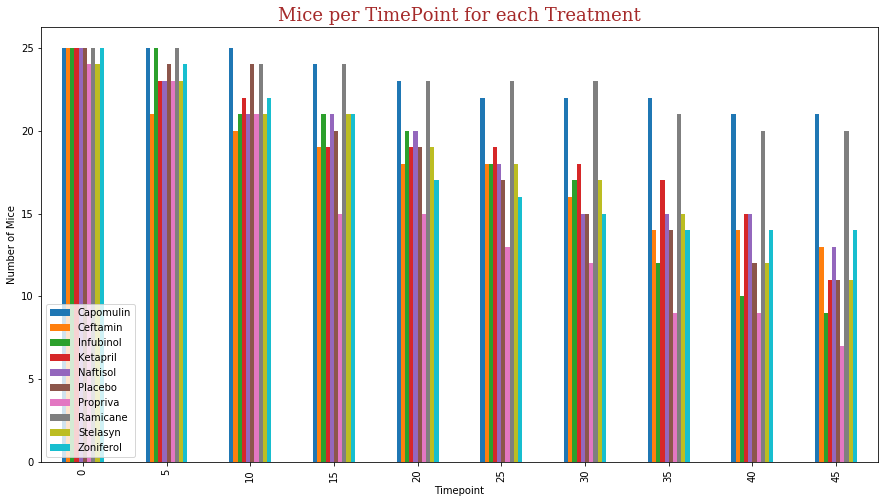

<Figure size 432x288 with 0 Axes>

In [78]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course 
# of the study using pandas.

panda_bar_df.plot(kind="bar", figsize=(15,8))

# Set a title for the chart
plt.title("Mice per TimePoint for each Treatment",titleFont)
plt.ylabel("Number of Mice")
plt.legend(loc='lower left', fontsize=10)

plt.savefig("../Images/Bar3.png")
plt.show()
plt.tight_layout()

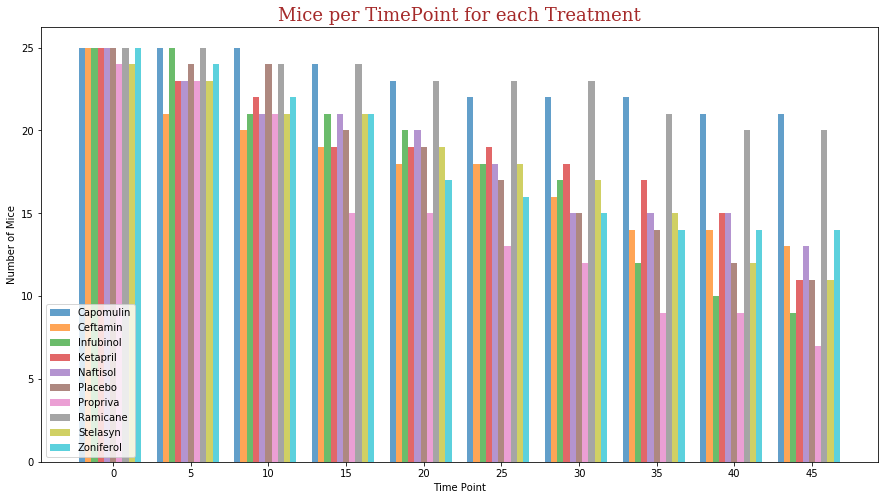

In [79]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
fig, ax = plt.subplots(figsize=(15, 8)) 

for i in range(1,len(flat_df.keys())):
    plt.bar(pos_df[i], flat_df.iloc[:,i], barWidth, alpha=.7, label=Drugs[i])

# Give our graph axis labels, and legends
plt.title('Mice per TimePoint for each Treatment', fontdict=titleFont)
plt.xlabel("Time Point")
plt.ylabel("Number of Mice")
plt.legend(loc='lower left', fontsize=10)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in pos_df[1] + 0.4]
plt.xticks(tick_locations, flat_df['Timepoint'])

plt.savefig("../Images/Bar4.png")
plt.show()

In [80]:
#Line graphs is the more appropriate chart to show case the information, because line chart is the best chart¶
#to compare changes over the same period of time for more than one group.

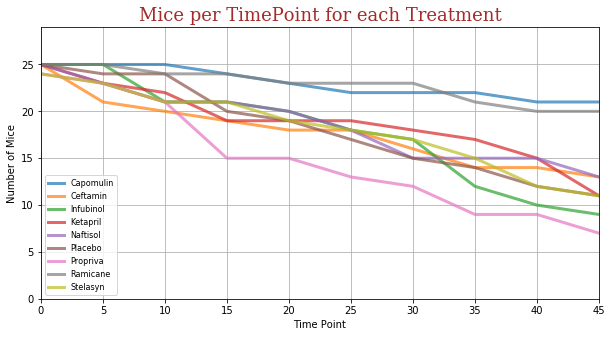

In [81]:
# Line chart
fig, ax = plt.subplots(figsize=(10, 5)) 

for i in range(1,10):
    plt.plot(flat_df['Timepoint'], flat_df.iloc[:,i], label=Drugs[i], alpha=.7,linewidth=3)

# Give our graph axis labels, and legends
plt.title('Mice per TimePoint for each Treatment', fontdict=titleFont)
plt.xlabel("Time Point")
plt.ylabel("Number of Mice")
plt.legend(loc='lower left', fontsize=8)    
plt.xlim(0,45)
plt.ylim(0,29)
plt.grid()

plt.savefig("../Images/Bar5.png")
plt.show()

## Pie Plots

In [82]:
# Generate data the distribution of female versus male mice 
gender = study_df.groupby('Sex').count()['Mouse ID']
gender

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

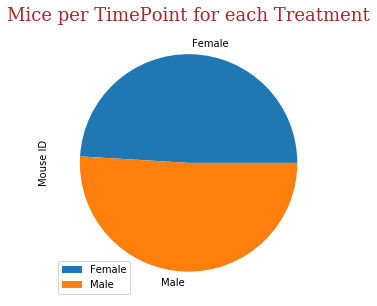

<Figure size 432x288 with 0 Axes>

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender.plot(kind="pie", legend = False, figsize=(8,5), rot = 70)

# Set a title for the chart
plt.title("Mice per TimePoint for each Treatment",titleFont)
plt.legend(loc='lower left', fontsize=10)

plt.savefig("../Images/Pie1.png")
plt.show()
plt.tight_layout()

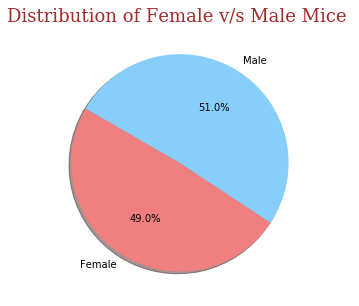

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots(figsize=(8, 5)) 
Labels = ["Female","Male"]

plt.pie(gender,  labels=Labels, colors=("lightcoral", "lightskyblue"),
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title('Distribution of Female v/s Male Mice ', fontdict=titleFont)

plt.savefig("../Images/Pie2.png")

## Quartiles, Outliers and Boxplots

In [85]:
# Determine the four of the most promising treatment regimens, as the treatment that 
# has the largest number of remining mice at the end of the study and the smallest average tumor volume
# according to the number of reminding mice at the end of study (see analysis above), the best studies are :
# Capomulin(21), Ramicane(20), Zoniferol(14), Ceftamin(13), Naftisol(13)

In [86]:
# average tumor volume at the end of study
tumor_pt = study_df.pivot_table(index='Timepoint',values=["Tumor Volume (mm3)"], columns='Drug Regimen')
tumor_df = pd.DataFrame(tumor_pt.to_records())
tumor_df.columns = [hdr.replace("('Tumor Volume (mm3)', '", "").replace("')", "") \
                     for hdr in tumor_df.columns]
tumor_df = tumor_df.transpose()
tumor_df

,0,1,2,3,4,5,6,7,8,9
Timepoint,0.0,5.000000,10.000000,15.000000,20.000000,25.000000,30.000000,35.000000,40.000000,45.000000
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421
Infubinol,45.0,46.541247,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562
Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506
Placebo,45.0,47.125589,49.423329,51.359742,54.364417,57.482574,59.809063,62.420615,65.052675,68.084082
Propriva,45.0,47.168130,48.938560,50.891769,53.127384,55.462490,58.122548,60.103457,63.045537,66.258529
Ramicane,45.0,43.944859,42.531957,41.495061,40.238325,38.974300,38.703137,37.451996,36.574081,34.955595
Stelasyn,45.0,47.470830,49.335368,51.448025,53.970080,56.172821,59.870528,62.432021,65.356386,68.438310


In [87]:
# average tumor volume as a whole
average_tumor = study_df.groupby('Drug Regimen').mean()[["Tumor Volume (mm3)"]]
average_tumor = average_tumor.rename(columns={"Tumor Volume (mm3)":"Average"})
average_tumor["At the End"] = tumor_df.iloc[:,9]
print("    Tumor Volume (mm3)")                                              
average_tumor.sort_values("Average").round(2)

    Tumor Volume (mm3)


,Average,At the End
Drug Regimen,,
Ramicane,40.22,34.96
Capomulin,40.68,36.24
Propriva,52.32,66.26
Ceftamin,52.59,64.13
Infubinol,52.88,65.76
Zoniferol,53.24,65.96
Placebo,54.03,68.08
Stelasyn,54.23,68.44
Naftisol,54.33,69.27


In [88]:
# From these analysis, we choose Capomulin, Ramicane,  Ceftamin, Zoniferol

In [89]:
# Calculate the final tumor volume of each mouse 

plot_df = pd.DataFrame(np.arange(25), columns =[1])    #create first array, the index array

#for all the drugs, calculate the final tumor volume of each mouse
for i in range (1,len(Drugs)):                                              
    plot_df[Drugs[i]] = study_df.loc[study_df["Drug Regimen"] == Drugs[i], :].groupby('Mouse ID').last()[["Tumor Volume (mm3)"]].reset_index(drop=True)

plot_df = plot_df.drop([1], axis=1)   

plot_df.tail(2)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
23,28.484033,68.594745,67.685569,67.989530,65.741070,58.634971,48.710661,44.183451,45.934712,68.401286
24,31.896238,64.729837,62.754451,62.909441,73.867845,66.842635,NaN,30.638696,NaN,48.077646


In [90]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
IQR_df = plot_df.describe().transpose()
IQR_df["IQR"] = IQR_df["75%"] - IQR_df["25%"]
IQR_df["UB"] = IQR_df["75%"] + (1.5*IQR_df["IQR"])
IQR_df["LB"] = IQR_df["25%"] - (1.5*IQR_df["IQR"])
IQR_df["U outliers"] = IQR_df["max"] > IQR_df["UB"]
IQR_df["L outliers"] = IQR_df["min"] < IQR_df["LB"]
IQR_df.round(2)

,count,mean,std,min,25%,50%,75%,max,IQR,UB,LB,U outliers,L outliers
Capomulin,25.0,36.67,5.72,23.34,32.38,38.13,40.16,47.69,7.78,51.83,20.70,False,False
Ceftamin,25.0,57.75,8.37,45.00,48.72,59.85,64.30,68.92,15.58,87.67,25.36,False,False
Infubinol,25.0,58.18,8.60,36.32,54.05,60.17,65.53,72.23,11.48,82.74,36.83,False,True
Ketapril,25.0,62.81,9.95,45.00,56.72,64.49,69.87,78.57,13.15,89.60,36.99,False,False
Naftisol,25.0,61.21,10.30,45.00,52.08,63.28,69.56,76.67,17.48,95.79,25.85,False,False
Placebo,25.0,60.51,8.87,45.00,52.94,62.03,68.13,73.21,15.19,90.92,30.16,False,False
Propriva,24.0,56.49,8.42,45.00,49.12,55.59,62.69,72.46,13.57,83.04,28.77,False,False
Ramicane,25.0,36.19,5.67,22.05,31.56,36.56,40.66,45.22,9.10,54.31,17.91,False,False
Stelasyn,24.0,61.00,9.50,45.00,52.48,62.19,69.10,75.12,16.63,94.04,27.54,False,False
Zoniferol,25.0,59.18,8.77,45.00,49.99,61.84,66.79,73.32,16.81,92.00,24.78,False,False


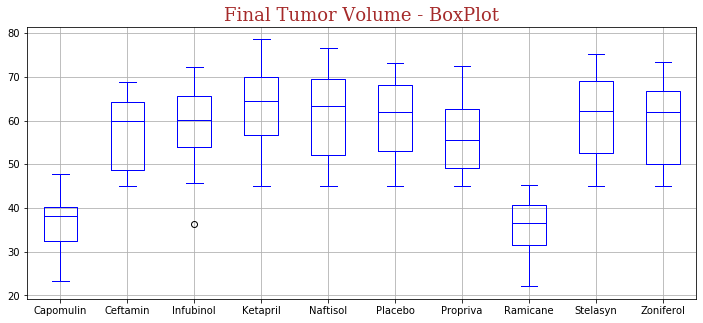

In [91]:
# Generate a box plot of the final tumor volume of each mouse
fig, ax = plt.subplots(figsize=(12, 5)) 

plot_df.boxplot(color='blue')
plt.title('Final Tumor Volume - BoxPlot', fontdict=titleFont)
plt.savefig("../Images/Plot1.png")

In [92]:
# Both the quantitative analysis and the box plot shows that outliers only happened at infbinol

In [93]:
# The company four drug regiments of interest are their own Capomulin, Ramicane, Cenftamin, and Infubinol 
# We generate blog plot for those drug regiments

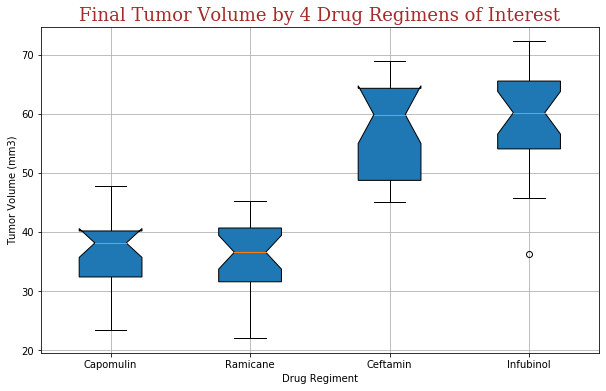

In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(10, 6)) 
data = [plot_df.iloc[:,0],plot_df.iloc[:,7],plot_df.iloc[:,1],plot_df.iloc[:,2]]
Drugs4 =["Capomulin", "Ramicane",  "Ceftamin", "Infubinol"]
tick_locations = [1,2,3,4]

plt.boxplot(data, notch=True, patch_artist=True)

# Give our graph axis labels, and legends
plt.title('Final Tumor Volume by 4 Drug Regimens of Interest', fontdict=titleFont)
plt.xlabel("Drug Regiment")
plt.ylabel("Tumor Volume (mm3)")  
plt.xticks(tick_locations, Drugs4)
plt.grid() 

plt.savefig("../Images/Plot2.png")
plt.show()

## Line and Scatter Plots

In [95]:
# Generate data of time point versus tumor volume for mice treated with Capomulin
c_df = study_df.loc[study_df["Drug Regimen"] == "Capomulin", :]
cp_pt = c_df.pivot_table(index='Timepoint',values=["Tumor Volume (mm3)"], columns='Mouse ID')
cp_df = pd.DataFrame(cp_pt.to_records())
cp_df.columns = [hdr.replace("('Tumor Volume (mm3)', '", "").replace("')", "") \
                     for hdr in cp_df.columns]
cp_df

,Timepoint,b128,b742,f966,g288,g316,i557,i738,j119,j246,...,r944,s185,s710,t565,u364,v923,w150,w914,x401,y793
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,45.651331,41.534097,38.796474,45.839400,44.022752,42.261665,45.595685,45.838998,45.641438,...,45.737145,43.878496,43.180977,45.895647,45.760886,45.704434,39.202129,45.893720,45.473753,41.019913
2,10,43.270852,41.999228,35.624403,46.304003,44.502042,42.992077,43.421014,46.425366,46.408361,...,46.544292,37.614948,43.688026,46.749006,46.568417,39.848223,39.952347,43.231963,39.113891,41.630010
3,15,43.784893,39.524843,32.623003,42.172301,45.216743,43.529876,37.978778,47.322984,43.312654,...,47.373423,38.177232,41.845235,44.440949,47.212200,40.457989,NaN,43.688449,39.776250,42.283665
4,20,42.731552,37.950355,30.485985,42.957120,45.933322,43.967895,38.531136,48.158209,44.020370,...,43.225671,36.866876,42.629963,39.070214,40.343948,39.648296,NaN,41.108092,36.065835,40.716428
5,25,43.262145,38.617684,NaN,42.368692,46.809225,44.596219,34.973438,42.417166,44.555226,...,41.086991,33.949940,43.060409,37.342210,35.503616,40.156413,NaN,40.291917,36.617120,38.992734
6,30,40.605335,39.167949,NaN,42.874461,44.221480,45.261384,35.578780,43.013681,38.044082,...,41.680791,32.959671,43.571703,32.868916,35.978334,40.752216,NaN,40.993110,32.915292,35.726023
7,35,37.967644,39.847576,NaN,38.954115,44.702833,45.941949,36.175953,43.765705,38.753265,...,40.401765,28.328531,44.160519,33.515671,35.459490,41.439242,NaN,41.664916,30.206825,36.327870
8,40,38.379726,38.255627,NaN,36.356851,45.565821,46.821070,36.843898,44.585090,NaN,...,41.042045,25.472143,40.171920,33.949341,36.024138,42.151015,NaN,35.611309,28.167397,31.475411
9,45,38.982878,38.939633,NaN,37.074024,40.159220,47.685963,37.311846,38.125164,NaN,...,41.581521,23.343598,40.728578,34.455298,31.023923,40.658124,NaN,36.041047,28.484033,31.896238


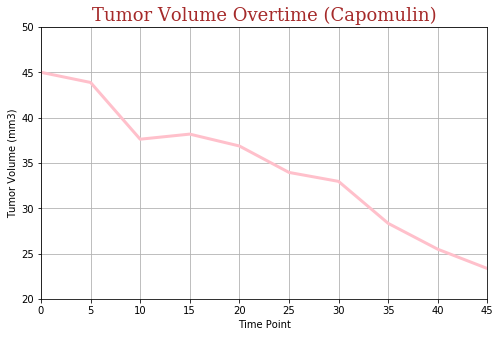

In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

fig, ax = plt.subplots(figsize=(8, 5)) 

plt.plot(cp_df['Timepoint'], cp_df.iloc[:,17], color ="pink",linewidth=3)

# Give our graph axis labels, and legends
plt.title('Tumor Volume Overtime (Capomulin)', fontdict=titleFont)
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")  
plt.xlim(0,45)
plt.ylim(20,50)
plt.grid() 

plt.savefig("../Images/Line1.png")
plt.show()

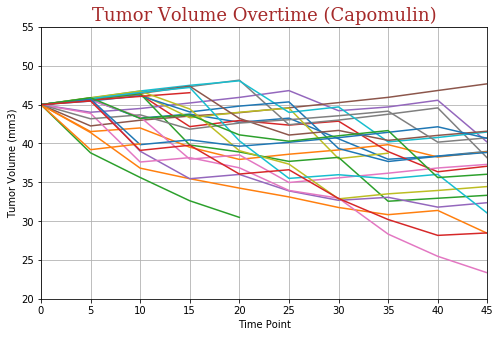

In [97]:
# Generate a line plot of time point versus tumor volume for all the mice treated with Capomulin
fig, ax = plt.subplots(figsize=(8, 5)) 
for i in range(1,25):
    plt.plot(cp_df['Timepoint'], cp_df.iloc[:,i])

    # Give our graph axis labels, and legends
plt.title('Tumor Volume Overtime (Capomulin)', fontdict=titleFont)
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")  
plt.xlim(0,45)
plt.ylim(20,55)
plt.grid()  

plt.savefig("../Images/Line2.png")
plt.show()

In [98]:
# Generate data of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = study_df.loc[study_df["Drug Regimen"] == "Capomulin", :].groupby('Mouse ID', as_index = False).mean()
weight_df.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
0,b128,22.5,41.963636,0.7,9.0,22.0
1,b742,22.5,40.083699,0.0,7.0,21.0
2,f966,10.0,36.505973,0.0,16.0,17.0


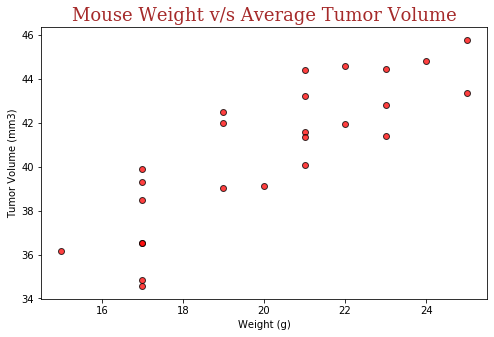

In [99]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig, ax = plt.subplots(figsize=(8, 5)) 

plt.scatter(weight_df['Weight (g)'], weight_df['Tumor Volume (mm3)'],  marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# Give our graph axis labels, and legends
plt.title('Mouse Weight v/s Average Tumor Volume', fontdict=titleFont)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")  

plt.savefig("../Images/Scatter1.png")
plt.show()

## Correlation and Regression

In [105]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = weight_df.iloc[:,5]
avg_tumor_vol = weight_df.iloc[:,2]

correlation = st.pearsonr(mouse_weight,avg_tumor_vol)
corr = round(correlation[0],2)
lin_reg= st.linregress(mouse_weight,avg_tumor_vol)
print(f"Correlation {correlation}")
print(lin_reg)

Correlation (0.8419363424694717, 1.322572243471279e-07)
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


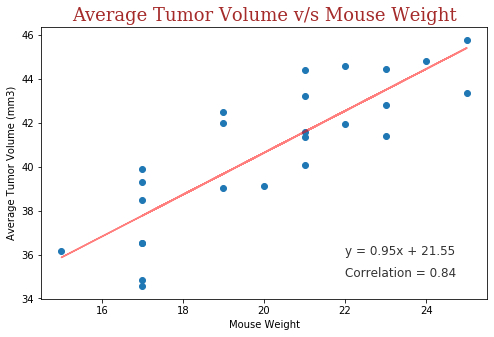

In [112]:
mouse_weight = weight_df.iloc[:,5]
avg_tumor_vol = weight_df.iloc[:,2]

x_values = weight_df.iloc[:,5]
y_values = weight_df.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


fig, ax = plt.subplots(figsize=(8, 5)) 

# Plot scatter chart
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha = .5)

plt.annotate(line_eq,(22,36),fontsize=12,color="black", alpha = .8)
plt.annotate(f"Correlation = {corr}",(22,35),fontsize=12,color="black", alpha = .8)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume v/s Mouse Weight', fontdict=titleFont)

plt.savefig("../Images/Scatter3.png")
plt.show()